In [1]:
import numpy as np
from scipy.linalg import svd, hankel, eig
from matplotlib import pyplot as plt
import scipy
from tqdm import trange
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, ExpSineSquared, WhiteKernel
#import jax.numpy as jnp
from scipy.io import savemat, loadmat

In [2]:
np.random.seed(999)

In [3]:
noise = 0.1
overlap = 0.2
Tmax = 100
dt = 1

In [4]:
def generate_samples(E, psi0, dt=1, nb=100):
    S = np.zeros(nb, dtype=np.complex128)
    
    for j in trange(nb):
        S[j] = np.sum(np.abs(psi0)**2 * np.exp(-1j * E * j * dt))
    
    return S

In [5]:
def generate_samples_der(E, psi0, dt=1, nb=100, n=1):
    S = np.zeros(nb, dtype=np.complex128)
    
    for j in trange(nb): 
        S[j] = np.sum(np.abs(psi0)**2 * (-1j * E)**n * np.exp(-1j * E * j * dt))
    
    return S

In [6]:
def lam2lamt(lam, lammin, lammax):
    lamt = np.pi / 2 * (lam - (lammin + lammax) / 2) / (lammax - lammin)
    return lamt

In [7]:
def lamt2lam(lamt, lammin, lammax):
    lam = lamt * 2 / np.pi * (lammax - lammin) + (lammin + lammax) / 2
    return lam

In [8]:
def generate_phi(overlap, N):
    phi = np.zeros((N,1))
    phi[0] = np.sqrt(overlap)
    phi[1:] = np.sqrt((1 - phi[0]**2) / (N - 1))
    # phi[1] = np.sqrt(overlap)
    # phi[0] = np.sqrt((1 - phi[1]**2) / (N - 1))
    # phi[2:] = np.sqrt((1 - phi[1]**2) / (N - 1))
    return phi

In [9]:
data_cr2 = scipy.io.loadmat('../../data/Cr2_4000.mat')
psiHF = data_cr2['psiHF']
E = data_cr2['E']

In [10]:
np.abs(psiHF)**2

array([[7.24438413e-01],
       [6.70554546e-04],
       [4.02594970e-05],
       ...,
       [9.66974099e-05],
       [2.42625101e-18],
       [2.64112274e-05]])

In [11]:
len(E)

4000

In [12]:
# Et = lam2lamt(E,E[0],E[-1])
E_center = E - (E.min() + E.max())/2
Et = E_center / np.abs(E_center).max()

In [13]:
phi = generate_phi(overlap,len(Et))
print('generated phi')
dataS = generate_samples_der(Et,phi,dt,Tmax, n=0)

generated phi


100%|██████████| 100/100 [00:00<00:00, 6678.83it/s]


Text(0.5, 1.0, 'True dynamics')

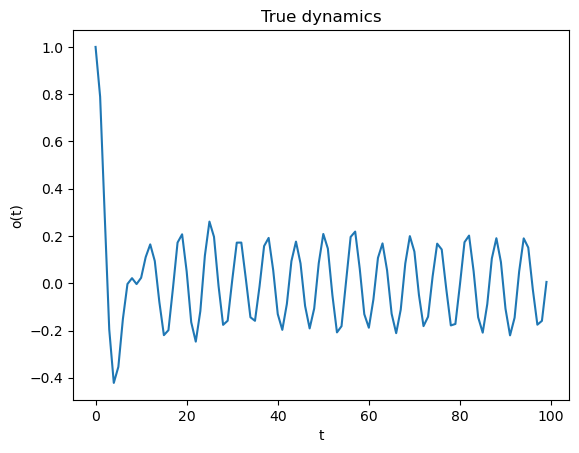

In [14]:
plt.plot(dataS.real)
plt.xlabel('t')
plt.ylabel('o(t)')
plt.title('True dynamics')

In [15]:
# with open('mystery_realization_deltat=1_true.npy', 'wb') as f:
#     np.save(f, dataS.real)

In [16]:
# dataS_second_der =generate_samples_der(Et,psiHF,dt,Tmax, n=2)

In [17]:
# dataS_derivative_info = []
# dataS_derivative_info.append(dataS)
# dataS_derivative_info.append(-dataS_second_der)
# ndataS_derivative_info = np.array(dataS_derivative_info)
# ndataS_derivative_info.T.flatten().shape

In [18]:
# from scipy.io import savemat
# savemat('../../matlab/denoised_data/denoised_dataS_Cr2_noiseless_data_Tmax=' + str(Tmax) + '_noise=' + str(noise) + '_dt=0.75pi_complex.mat', {'denoised_dataS': ndataS_derivative_info.T.flatten()})

In [19]:
tdataS = []
num_trajs = 10
for i in range(num_trajs):
    ndataS = (dataS + noise * np.random.randn(Tmax) + 1j * noise * np.random.randn(Tmax)).real
    clipped = np.clip(ndataS, -1, 1)
    clipped[0] = 1.0 
    tdataS.append(clipped)

In [20]:
# tdataS = dataS + noise * np.random.randn(Tmax) + 1j * noise * np.random.randn(Tmax)
# tdataS = np.clip(tdataS, -1, 1)

In [21]:
# for n in range(len(n_shots)):
#     plt.plot(dataS.real)
#     plt.plot(noisy_shots_dataS[n], '--')
#     plt.title('Nshots = ' + str(n_shots[n]))
#     plt.legend(['noiseless data', 'noisy data'], frameon=False)
#     plt.ylim([-1, 1])
#     plt.xlabel('t')
#     plt.ylabel('s(t)')
#     plt.tight_layout()
#     plt.savefig('./gif_figs/LiH_dataS_nshots='+str(n_shots[n])+'.png')
#     plt.close()

In [22]:
# plt.plot(avg_noisy_shots_dataS[0])
# plt.plot(dataS.real)

In [23]:
# plt.figure(figsize=(10, 6))
# for i in range(len(n_shots[:])):
#     s_tk = noisy_shots_dataS[i]
#     N = n_shots[i]
#     rhs_l = []
#     for j in range(s_tk.shape[0]):
#         numerator = np.sqrt(1 - s_tk[j]**2)
#         denominator = np.sum(np.sqrt(1 - s_tk ** 2))
#         rhs_l.append((numerator / denominator))
#     print('Total shots spent: ', np.sum(rhs_l))
#     plt.plot( rhs_l, label=f'N = {N}')
#     #plt.plot([0, Tmax], [N / Tmax, N / Tmax], ':k')
# plt.xlabel(r'$t$')
# plt.ylabel(r'$N \left( \frac{\sqrt{1 - s(t_k)^2}}{\sum_k \sqrt{1 - s(t_k)^2}} \right)$')
# plt.legend(frameon=False)
# plt.title('Optimal shot allocation')
# plt.savefig('optimal_shot_allocation.png')
# plt.show()

In [24]:
noisydataS = np.array(tdataS)
noisydataS.shape

(10, 100)

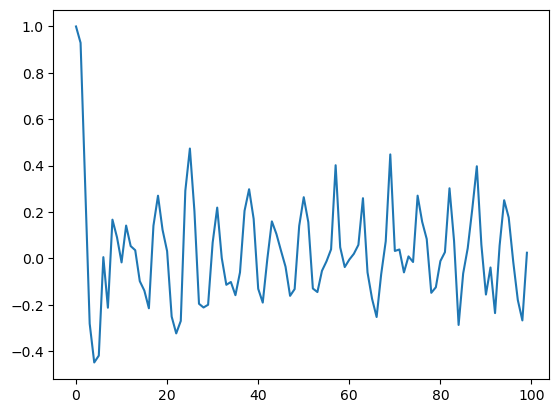

In [25]:
#tdataS[0] = 1.0 + 0.0j
plt.plot(tdataS[0].real)
#plt.plot(tdataS.real)

In [26]:
# for i in range(noisydataS.shape[0]):
#     plt.plot(noisydataS[i, :]);
# plt.plot(dataS.real, '-', color='black', label='Noiseless observables')
# plt.xlabel('t')
# plt.ylabel('o(t)')
# plt.ylim([-1, 1])
# plt.legend()
# plt.title('Noisy observables')
# #plt.savefig('noisy_data_vs_noiseless.png')

In [67]:
t = np.arange(0, Tmax, 1) * dt

In [68]:
# Fit GP to the signals
#y = noisydataS.real.T
y = noisydataS
X = np.tile(t, (len(y), 1))  # Repeat t to create as many rows as in y
#X = t[:, np.newaxis]
#y = average_noisy_signal
X.shape, y.shape

((10, 100), (10, 100))

In [71]:
#kernel = C(1.0, (1e-6, 1e1)) * RBF(1.0, (1e-4, 1e3)) * ExpSineSquared(length_scale=1.0, periodicity=1.0, length_scale_bounds=(1e-4, 1e3))+ WhiteKernel(noise_level=np.std(y), noise_level_bounds=(np.std(y)/100, 10*np.std(y)))
#kernel = C(1.0, (1e-6, 1e1)) * RBF(1.0, (1e-4, 1e3)) * ExpSineSquared(length_scale=1.0, periodicity=1.0, length_scale_bounds=(1e-4, 1e3))+ WhiteKernel(noise_level=noise, noise_level_bounds=(noise/100, 10*noise))
#kernel = C(1.0, (1e-6, 1e1))  * ExpSineSquared(length_scale=1.0, periodicity=1.0, length_scale_bounds=(1e-4, 1e2)) + WhiteKernel(noise_level=noise, noise_level_bounds=(noise/100, 10*noise))
kernel = C(1.0, (1e-6, 1e1)) * RBF(1.0, (1e-4, 1e3))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=25, alpha=1e-5)
gp.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-05, kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=25)

In [72]:
# Predict
mean_prediction, std_prediction = gp.predict(X, return_std=True)

In [73]:
X_train.shape

(10, 50)

In [74]:
gp.kernel_

0.206**2 * RBF(length_scale=0.000122)

In [75]:
mean_prediction = np.mean(mean_prediction, axis=0)
mean_prediction[0] = 1

In [76]:
std_prediction = np.mean(std_prediction, axis=0)

In [53]:
# plt.figure(figsize=(10, 6))
# plt.plot(t, dataS.real, 'black', label='True observables')
# plt.plot(t, mean_prediction, 'r-', label='GP Mean')
# #plt.fill_between(t, mean_prediction - 2*std_prediction, mean_prediction + 2*std_prediction, color='r', alpha=0.2, label='GP 95% Confidence Interval')
# plt.plot(t, y, 'b', alpha=0.5, label='Noisy observations')
# plt.xlabel('t')
# plt.ylabel('o(t)')
# plt.legend()
# #plt.savefig('gp_denoiser_cr2.pdf')

ValueError: x and y must have same first dimension, but have shapes (100,) and (10, 100)

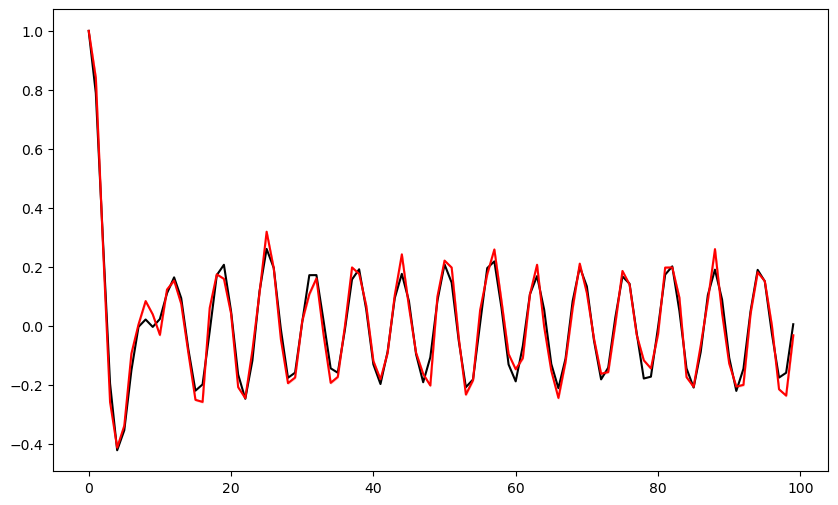

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(t, dataS.real, 'black', label='True observables')
plt.plot(t, mean_prediction, 'r-', label='GP Mean')
plt.fill_between(t, mean_prediction - 2*std_prediction, mean_prediction + 2*std_prediction, color='r', alpha=0.2, label='GP 95% credible region')
plt.plot(t, y, 'b.', alpha=0.5, label='Noisy observations')
plt.xlabel('t')
plt.ylabel('o(t)')
plt.legend(frameon=False)
plt.title('GP denoised observables')
plt.tight_layout()
#plt.savefig('gp_denoiser_cr2.png')

In [55]:
np.mean(np.abs(mean_prediction - dataS.real)), np.mean(np.abs(mean_prediction - noisydataS.real)), np.mean(np.abs(noisydataS.real - dataS.real))

(0.027357420163920402, 0.07407486670779094, 0.07924400456036756)

In [37]:
# Predict
mean_prediction_trunc, std_prediction_trunc = gp.predict(X[:250, :], return_std=True)

In [38]:
mean_prediction_trunc[0] = 1

ValueError: x and y must have same first dimension, but have shapes (100,) and (10, 100)

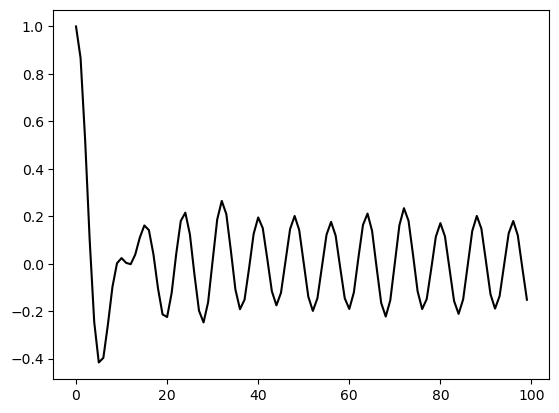

In [39]:
plt.plot(t[:250], dataS[:250].real, 'black', label='Noiseless observables')
plt.plot(t[:250], mean_prediction_trunc, 'r-', label='GP mean')
plt.fill_between(t[:250], mean_prediction_trunc - 2*mean_prediction_trunc, mean_prediction_trunc + 2*std_prediction_trunc, color='r', alpha=0.2, label='GP 95% credible region')
plt.plot(t[:250], y[:250], 'b.', alpha=0.5, label='Noisy observation')
plt.xlabel('t')
plt.ylabel('o(t)')
plt.legend()
plt.title('GP denoised observables')
plt.tight_layout()
#plt.savefig('./gif_figs/Cr2_denoised_traj_Tmax=250_noise=1.0.png')

In [68]:
# np.linalg.norm(mean_prediction_trunc - dataS[:250].real)

In [46]:
# Predict
tpred = np.arange(0, Tmax, 1) * dt
tpred = tpred[:, np.newaxis]
mean_prediction_full, std_prediction_full = gp.predict(tpred, return_std=True)

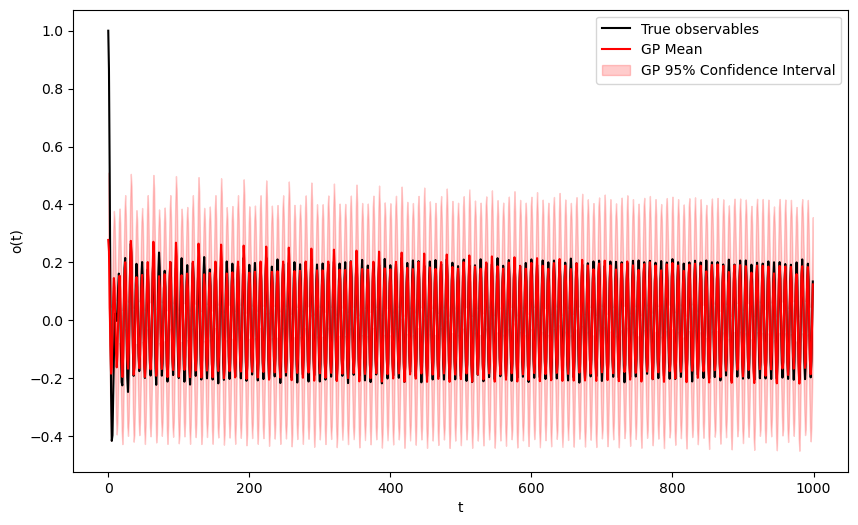

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(tpred, dataS.real, 'black', label='True observables')
plt.plot(tpred, mean_prediction_full, 'r-', label='GP Mean')
plt.fill_between(tpred.flatten(), mean_prediction_full - 2*std_prediction_full, mean_prediction_full + 2*std_prediction_full, color='r', alpha=0.2, label='GP 95% Confidence Interval')
#plt.plot(t, average_noisy_signal, 'g.', alpha=0.5, label='Average Noisy Signal')
plt.xlabel('t')
plt.ylabel('o(t)')
plt.legend()
#plt.savefig('gp_denoiser_cr2.pdf')

In [52]:
t = np.arange(0, Tmax, 1) * dt

In [53]:
# Define the RBF kernel function
def rbf_kernel(t1, t2, length_scale=1.0):
    return np.exp(-0.5 * (np.subtract.outer(t1, t2) ** 2) / length_scale**2)

# Define the ExpSineSquared (Periodic) kernel function
def periodic_kernel(t1, t2, length_scale=1.0, periodicity=1.0):
    return np.exp(-2 * np.sin(np.pi * np.abs(np.subtract.outer(t1, t2)) / periodicity)**2 / length_scale**2)

# Define the combined quasiperiodic kernel (RBF * Periodic)
def quasiperiodic_kernel(t1, t2, length_scale_rbf=1.0, length_scale_periodic=1.0, periodicity=1.0):
    return rbf_kernel(t1, t2, length_scale_rbf) * periodic_kernel(t1, t2, length_scale_periodic, periodicity)

# Define the full kernel with noise (White kernel)
def full_kernel(t1, t2, length_scale_rbf=1.0, length_scale_periodic=1.0, periodicity=1.0, noise_level=0.0):
    # Quasiperiodic part
    K = quasiperiodic_kernel(t1, t2, length_scale_rbf, length_scale_periodic, periodicity)
    # Add white noise term on the diagonal
    if t1.shape == t2.shape:  
        K += noise_level**2 * np.eye(len(t1))
    return K


In [ ]:
gp.kernel_

In [55]:
sigma_noise = noise
# Parameters for the kernel 
length_scale_rbf = 3.73 # RBF length scale
length_scale_periodic =471 # Periodic kernel length scale
periodicity =113  # Periodicity parameter
#sigma_noise = np.sqrt(9.79e-05)  # Noise level (standard deviation)

In [56]:
 #Training data: Covariance matrix K (with noise term)
K = full_kernel(t, t, length_scale_rbf, length_scale_periodic, periodicity, noise_level=sigma_noise)

# Invert the covariance matrix (K + noise term)
K_inv = np.linalg.inv(K)

# Define the covariance between the test points and the training points
k_star = full_kernel(t, t, length_scale_rbf, length_scale_periodic, periodicity, noise_level=0.0)  # no noise for k_star

# Implement the update formula for the predicted mean y*
y_star = k_star @ K_inv @ y

# y_star contains the GP predictions for the points in t

In [57]:
# # Training data: Covariance matrix K (with noise term)
# K = rbf_kernel(t, t, length_scale=computed_length_scale) + sigma_noise**2 * np.eye(len(t))
# K_inv = np.linalg.inv(K)

In [58]:
# # Define the covariance between the test points and the training points
# k_star = rbf_kernel(t, t, length_scale=computed_length_scale)

In [59]:
# # Implement the update formula for the predicted mean y*
# y_star = k_star @ K_inv @ y 

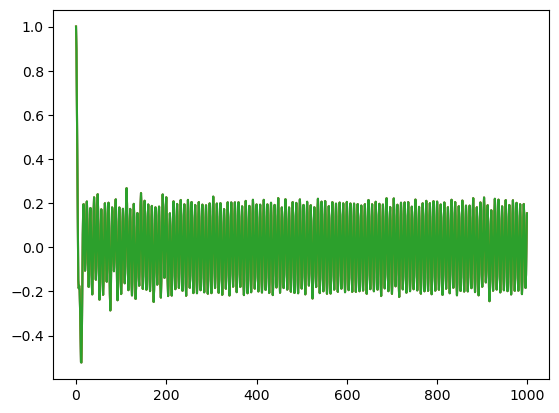

In [60]:
plt.plot(t, dataS.real)
plt.plot(t, mean_prediction)
plt.plot(t, y_star)

In [61]:
np.mean(np.abs(y_star - dataS.real)), np.mean(np.abs(mean_prediction - dataS.real)), np.mean(np.abs(y_star - mean_prediction))

(5.571228557016523e-05, 6.257315222949186e-05, 3.442155026225485e-05)

In [62]:
# Define the RBF kernel function
def rbf_kernel(t1, t2, length_scale=1.0):
    return np.exp(-0.5 * (np.subtract.outer(t1, t2) ** 2) / length_scale**2)

# Define the ExpSineSquared (Periodic) kernel function
def periodic_kernel(t1, t2, length_scale=1.0, periodicity=1.0):
    return np.exp(-2 * np.sin(np.pi * np.abs(np.subtract.outer(t1, t2)) / periodicity)**2 / length_scale**2)

# Define the combined quasiperiodic kernel (RBF * Periodic)
def quasiperiodic_kernel(t1, t2, length_scale_rbf=1.0, length_scale_periodic=1.0, periodicity=1.0):
    return rbf_kernel(t1, t2, length_scale_rbf) * periodic_kernel(t1, t2, length_scale_periodic, periodicity)

# Define the full kernel with noise (White kernel)
def full_kernel(t1, t2, length_scale_rbf=1.0, length_scale_periodic=1.0, periodicity=1.0, noise_level=0.0):
    K = quasiperiodic_kernel(t1, t2, length_scale_rbf, length_scale_periodic, periodicity)
    if t1.shape == t2.shape:  # Only add noise for training data
        K += noise_level**2 * np.eye(len(t1))
    return K

# Given parameters
sigma_noise = noise
length_scale_rbf = 2.96  # RBF length scale
length_scale_periodic = 361  # Periodic kernel length scale
periodicity = 81.5  # Periodicity parameter

# Training data
K = full_kernel(t, t, length_scale_rbf, length_scale_periodic, periodicity, noise_level=sigma_noise)
K_inv = np.linalg.inv(K)

# Define the covariance between the test points and the training points
k_star = full_kernel(t, t, length_scale_rbf, length_scale_periodic, periodicity, noise_level=0.0)

# Compute the gradient of k_star with respect to t (first argument)
def gradient_quasiperiodic_kernel(t1, t2, length_scale_rbf=1.0, length_scale_periodic=1.0, periodicity=1.0):
    # Compute the gradient with respect to the first argument (t1)
    K_rbf = rbf_kernel(t1, t2, length_scale_rbf)
    K_periodic = periodic_kernel(t1, t2, length_scale_periodic, periodicity)
    
    grad_rbf = -np.subtract.outer(t1, t2) / length_scale_rbf**2 * K_rbf
    grad_periodic = -2 * np.cos(np.pi * np.abs(np.subtract.outer(t1, t2)) / periodicity) * \
        np.pi / periodicity * np.sign(np.subtract.outer(t1, t2)) / length_scale_periodic**2 * K_periodic

    return grad_rbf * K_periodic + K_rbf * grad_periodic

# Compute the gradient of k_star with respect to t
grad_k_star = gradient_quasiperiodic_kernel(t, t, length_scale_rbf, length_scale_periodic, periodicity)

# Compute dy/dt for the predictions y*(t)
dy_dt_star = np.dot(grad_k_star, K_inv @ y)

100%|██████████| 1000/1000 [00:00<00:00, 7937.56it/s]


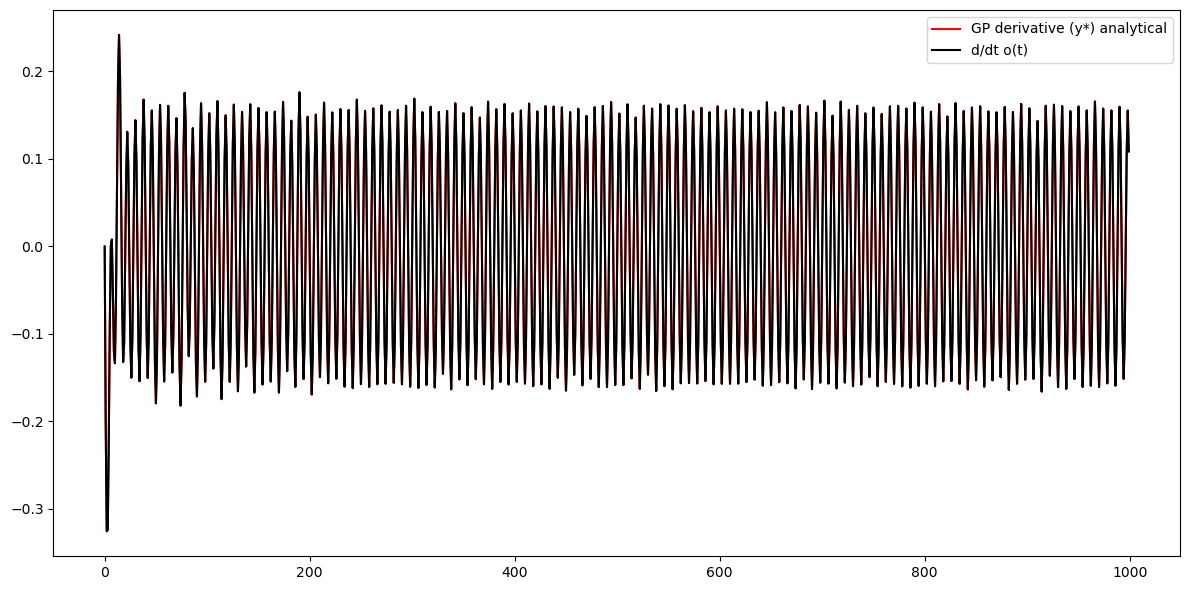

In [63]:
plt.figure(figsize=(12, 6)) 
plt.plot(t, dy_dt_star, label="GP derivative (y*) analytical", color='red')
#plt.plot(t, dy_dt_star_herm, label="GP derivative (y*) Hermite", color='green')
ddataS = generate_samples_der(Et,phi,dt,Tmax, n=1)
plt.plot(t, ddataS.real, label='d/dt o(t)', color='black')
#plt.plot(t, jdy_dt_star, '--', label='jax der')
plt.legend()
plt.tight_layout()

In [64]:
np.mean(np.abs(dy_dt_star - ddataS.real))

7.231909816331338e-05

In [65]:
# from scipy.io import savemat
# savemat('../../matlab/denoised_data/denoised_dataS_Cr2_GP_Tmax='+str(Tmax)+'_first_der.mat', {'denoised_dataS': dy_dt_star})

In [66]:
# # Compute the second derivative of k_star with respect to t
# #second_deriv_k_star = (1 / computed_length_scale**2) * (1 - (t[:, None] - t[None, :])**2 / computed_length_scale**2) * k_star
# second_deriv_k_star = grad_k_star * -(t[:, None] - t[None, :]) / (computed_length_scale**2) + k_star * (-1 / computed_length_scale ** 2)
# d2y_dt2_star = np.dot(second_deriv_k_star, K_inv @ y) 

In [67]:
# herm2 = drbf(2, t1mt2, l=computed_length_scale).reshape((Tmax, Tmax))
# d2y_dt2_star_herm = np.dot(herm2, K_inv @ y) 

In [68]:
# # Plot the results: derivative of the GP mean vs true cosine function
# plt.figure(figsize=(12, 6)) 
# plt.plot(t, d2y_dt2_star, label="GP 2nd derivative (y*) analytical", color='red')
# plt.plot(t, d2y_dt2_star_herm, label="GP 2nd derivative (y*) Hermite")
# plt.plot(t, dddataS.real, label='d/dt o(t)', color='black')
# plt.legend()
# plt.tight_layout()

In [69]:
# np.linalg.norm(d2y_dt2_star - d2y_dt2_star_herm)

In [70]:
# for i in range(0, 11):
#     sample_dataS = generate_samples_der(Et,phi,dt,Tmax, n=i)
#     herm = drbf(i, t1mt2, l=computed_length_scale).reshape((Tmax, Tmax))
#     dy_dt_star_herm = np.dot(herm, K_inv @ y)
#     plt.figure(figsize=(12, 6))
#     plt.plot(t, dy_dt_star_herm, label="GP derivative (y*) Hermite", color='red')
#     plt.plot(t, sample_dataS.real, label=r' $o^'+str(i)+'(t)$', color='black')
    
  
#     plt.legend()
#     plt.tight_layout()
#     plt.title('Derivative: ' +str(i))
#     plt.show()

In [71]:
# dy_dt_star_herms = []
# for i in range(2):
#     nder = i
#     sample_dataS = generate_samples_der(Et,phi,dt,Tmax, n=nder)
#     herm = drbf(nder, t1mt2, l=computed_length_scale).reshape((Tmax, Tmax))
#     dy_dt_star_herm = np.dot(herm, K_inv @ y)
#     plt.figure(figsize=(12, 6))
#     plt.plot(t, dy_dt_star_herm, label="GP derivative (y*) Hermite", color='red')
#     plt.plot(t, sample_dataS.real, label=r' $o^'+str(i)+'(t)$', color='black')
    
  
#     plt.legend()
#     plt.tight_layout()
#     plt.title('Derivative: ' +str(i))
#     dy_dt_star_herms.append(dy_dt_star_herm)

In [72]:
# dy_dt_star_herms = np.array(dy_dt_star_herms)

In [67]:
dy_dt_star_herms.T

array([[ 0.99592361,  0.05715046],
       [ 0.90876283, -0.21474725],
       [ 0.61554432, -0.34606673],
       ...,
       [-0.13179283,  0.13171237],
       [ 0.02557107,  0.15754176],
       [ 0.1399539 ,  0.05893669]])

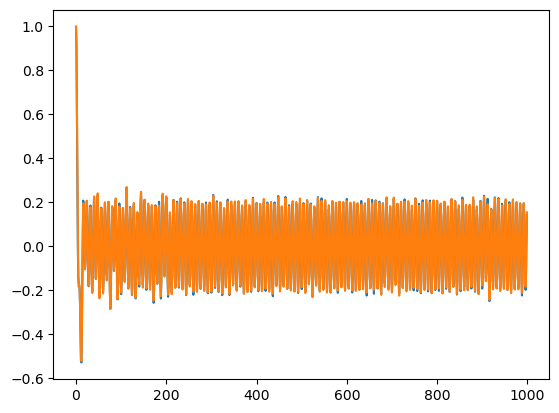

In [68]:
plt.plot(dy_dt_star_herms.T[:, 0])
plt.plot(dataS.real)

In [69]:
np.mean(np.abs(dy_dt_star_herms.T[:, 0] - dataS.real))

0.006434703565845551

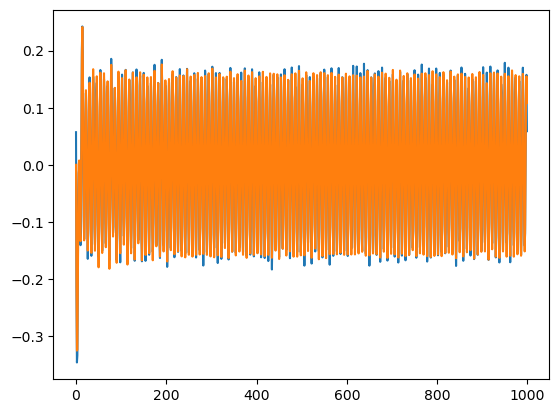

In [70]:
plt.plot(dy_dt_star_herms.T[:, 1])
plt.plot(ddataS.real)

In [71]:
np.mean(np.abs(dy_dt_star_herms.T[:,1] - ddataS.real))

0.007625651804532758

In [73]:
dataS_first_der = generate_samples_der(Et,phi,dt,Tmax, n=1)

100%|██████████| 1000/1000 [00:00<00:00, 7457.39it/s]


In [74]:
dataS_zero_der = generate_samples_der(Et,phi,dt,Tmax, n=0)

100%|██████████| 1000/1000 [00:00<00:00, 8056.50it/s]


In [75]:
dataS_second_der = generate_samples_der(Et, phi, dt, Tmax, n=2)

100%|██████████| 1000/1000 [00:00<00:00, 8007.16it/s]


In [76]:
# outE0 = dataS_second_der + Et[0].item()*dataS_zero_der + dataS_first_der + (1j*Et[0].item())*dataS_zero_der
pred_lam = Et[0].item()
outE0 = (dy_dt_star + ((1j*pred_lam)*mean_prediction ))/pred_lam

In [77]:
# outE0 = dataS_second_der + Et[0].item()*dataS_zero_der + dataS_first_der + (1j*Et[0].item())*dataS_zero_der
pred_lam_true = Et[0].item()
outE0_true = (dataS_first_der + ((1j*pred_lam_true)*dataS_zero_der))/pred_lam_true

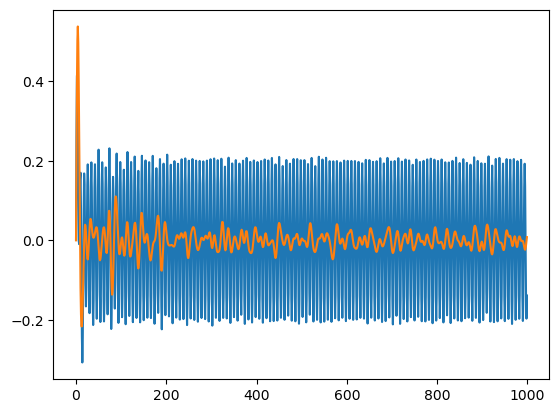

In [78]:
plt.plot(outE0.real)
plt.plot(outE0_true.real)

In [81]:
from scipy.io import savemat
savemat('../../matlab/denoised_data/denoised_dataS_LiH_true_projected_E0_Tmax' + str(Tmax) + '_overlap_ground_state=' + str(overlap) + 'noise=' + str(noise) + '_dt=1_der=1_normalized_complex.mat', {'denoised_dataS': outE0_true})